In [75]:
#import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load the dataset and set the 'encoding' parameter to 'latin-1',
df = pd.read_csv("Wearables-DFE.csv",encoding='latin-1')
df

,Name,Price,Body.Location,Category,Company.Name,Company.URL,Company...Mapping.Location,Company...City,Company...U.S..State,Company...Country,Source,Link,Duplicates.note.1,id,Image
0,Barska GB12166 Fitness Watch with Heart Rate M...,$49.99,Wrist,Fitness,Barska,http://www.barska.com/,"Pomona, California, United States",Pomona,California,United States,Google Results,https://www.google.com/shopping/product/104462...,NaN,200,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"Belkin GS5 Sport Fit Armband, Black F8M918B1C00",$24.99,Arms,Fitness,Belkin,http://www.belkin.com/,"Playa Vista, California, United States",Playa Vista,California,United States,Google Results,https://www.google.com/shopping/product/532655...,NaN,129,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,Bowflex EZ Pro Strapless Heart Rate Monitor Wa...,$12.99,Wrist,Medical,Bowflex,http://www.bowflex.com/,"Vancouver, Washington, United States",Vancouver,Washington,United States,Google Results,https://www.google.com/shopping/product/147942...,NaN,284,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,Casio G Shock Watch Solar Atom (gwm500a-1),$67.62,Wrist,Lifestyle,Casio,http://www.casio.com,"Tokyo, Japan",Tokyo,NaN,Japan,Google Results,https://www.google.com/shopping/product/393252...,NaN,145,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,Casio WS220 Solar Runner Digital Wrist Watch; ...,$39.99,Wrist,Lifestyle,Casio,http://www.casio.com,"Tokyo, Japan",Tokyo,NaN,Japan,Google Results,https://www.google.com/shopping/product/316195...,NaN,177,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,X-doria KidFit / Health and Fitness - Blue,$39,Wrist,Fitness,X-Doria,http://shop.x-doria.com/,"Los Angeles, California, United States",Los Angeles,California,United States,Google Results,https://www.google.com/shopping/product/536130...,NaN,406,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
578,Yes Watch KUNDALINI WTCH w/MIRROR POLISH FINSH,$850,Wrist,Lifestyle,Yes,http://www.yeswatch.com/,"La Jolla, California, United States",La Jolla,California,United States,Google Results,http://www.google.com/aclk?sa=l&ai=C-jKZfA92VL...,NaN,555,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
579,"YOO1 Activity Tracker with Trackit Jacket, Ras...",$24.99,Waist,Lifestyle,Yoo,http://www.yoochallenge.com/,"Ridgefield, Connecticut, United States",Ridgefield,Connecticut,United States,Google Results,https://www.google.com/shopping/product/390577...,NaN,365,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
580,Zepp Golf 3D Swing Analyzer,NaN,Hands,Gaming,Zepp,http://www.zepp.com/,"Los Gatos, California, United States",Los Gatos,California,United States,Amazon,http://www.amazon.com/Zepp-Golf-3D-Swing-Analy...,NaN,176,http://ecx.images-amazon.com/images/I/41-xwy5M...


In [73]:
df.rename(columns = {'Company...Mapping.Location':'Company.Mapping.Location', 'Company...City':'Company.City','Company...U.S..State':'Company.U.S.State','Company...Country':'Company.Country'}, inplace = True)

In [77]:
df.columns

Index(['Name', 'Price', 'Body.Location', 'Category', 'Company.Name',
       'Company.URL', 'Company...Mapping.Location', 'Company...City',
       'Company...U.S..State', 'Company...Country', 'Source', 'Link',
       'Duplicates.note.1', 'id', 'Image'],
      dtype='object')

## Exploratory Data Analysis

In [78]:
#check for null values
df.isna().sum()

Name                            0
Price                         212
Body.Location                   0
Category                       11
Company.Name                    8
Company.URL                    13
Company...Mapping.Location      2
Company...City                  2
Company...U.S..State          167
Company...Country              13
Source                          0
Link                            0
Duplicates.note.1             582
id                              0
Image                           0
dtype: int64

In [7]:
df.describe(include='O')

,Name,Price,Body.Location,Category,Company.Name,Company.URL,Company...Mapping.Location,Company...City,Company...U.S..State,Company...Country,Source,Link,Image
count,582,370,582,571,574,569,580,580,415,569,582,582,582
unique,582,217,9,8,145,142,108,107,22,14,2,582,564
top,Barska GB12166 Fitness Watch with Heart Rate M...,$99.99,Wrist,Fitness,Garmin,http://www.garmin.com/,"Olathe, Kansas, United States",Olathe,California,United States,Google Results,https://www.google.com/shopping/product/104462...,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
freq,1,16,345,215,65,65,65,65,152,415,370,1,3


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        582 non-null    object 
 1   Price                       370 non-null    object 
 2   Body.Location               582 non-null    object 
 3   Category                    571 non-null    object 
 4   Company.Name                574 non-null    object 
 5   Company.URL                 569 non-null    object 
 6   Company...Mapping.Location  580 non-null    object 
 7   Company...City              580 non-null    object 
 8   Company...U.S..State        415 non-null    object 
 9   Company...Country           569 non-null    object 
 10  Source                      582 non-null    object 
 11  Link                        582 non-null    object 
 12  Duplicates.note.1           0 non-null      float64
 13  id                          582 non

### Price Column

In [20]:
df["Price"] =df["Price"].astype('str')

In [29]:
#remove the $ using the .replace() method
df['Price'] = df['Price'].map(lambda x: x.replace('$',''))
df['Price']

0      49.99 
1      24.99 
2      12.99 
3      67.62 
4      39.99 
        ...  
577       39 
578      850 
579    24.99 
580       nan
581       nan
Name: Price, Length: 582, dtype: object

In [38]:
#remove the comma(',') using the .replace() method
df['Price'] = df['Price'].map(lambda x: x.replace(',',''))
df['Price']

0      49.99
1      24.99
2      12.99
3      67.62
4      39.99
       ...  
577       39
578      850
579    24.99
580      nan
581      nan
Name: Price, Length: 582, dtype: object

In [ ]:
#remove the " " using the .replace() method
df['Price'] = df['Price'].map(lambda x: x.replace(' ',''))
df['Price']

In [36]:
#remove the (refurbished) using the .replace() method
df['Price'] = df['Price'].map(lambda x: x.replace('(refurbished)',''))
df['Price']

0      49.99
1      24.99
2      12.99
3      67.62
4      39.99
       ...  
577       39
578      850
579    24.99
580      nan
581      nan
Name: Price, Length: 582, dtype: object

In [40]:
df["Price"] =df["Price"].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        582 non-null    object 
 1   Price                       370 non-null    float64
 2   Body.Location               582 non-null    object 
 3   Category                    571 non-null    object 
 4   Company.Name                574 non-null    object 
 5   Company.URL                 569 non-null    object 
 6   Company...Mapping.Location  580 non-null    object 
 7   Company...City              580 non-null    object 
 8   Company...U.S..State        415 non-null    object 
 9   Company...Country           569 non-null    object 
 10  Source                      582 non-null    object 
 11  Link                        582 non-null    object 
 12  Duplicates.note.1           0 non-null      float64
 13  id                          582 non

In [44]:
df["Price"].isna().sum()

212

**Almost 50% of the Price column comprises of null values!!!.If more than 50% of the values in a dataset are null values, this could indicate that there may be some issues with data collection or data processing. It's possible that some data points were not captured or were lost during data collection, or that there were errors in the data entry process. As a result, it's important to carefully consider the quality and completeness of the data before drawing any conclusions or making any decisions based on the dataset.**

### Body.Location

In [80]:
df["Body.Location"].value_counts()

Wrist    345
Head      97
Waist     56
Chest     25
Neck      19
Torso     16
Arms      11
Hands      9
Feet       4
Name: Body.Location, dtype: int64

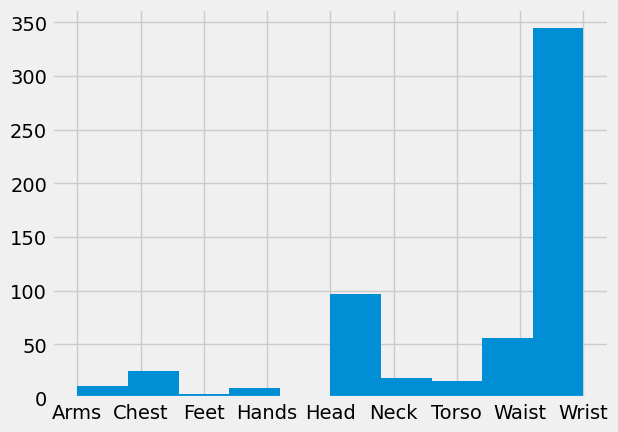

In [47]:
with plt.style.context("fivethirtyeight"):
    ax = plt.hist(df["Body.Location"].sort_values())
#work on fig size for this and one below

**The "Body.Location" column in the Wearables-DFE.csv dataset likely refers to the part of the body where the wearable device is intended to be worn. For businesses looking to understand the wearable technology market , the wrist, head, and waist are some of the most popular body locations for wearable technology with wrist being the most popular. But again the dataset is very small**

### Category

In [56]:
df["Category"].value_counts()

Fitness               215
Lifestyle             185
Entertainment         102
Medical                43
Pets and Animals       15
Gaming                  5
Lifestyle, Fitness      3
Industrial              3
Name: Category, dtype: int64

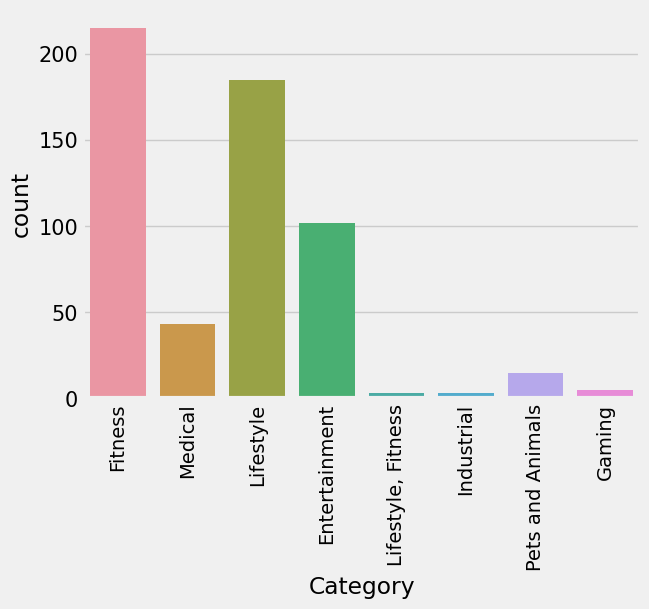

In [66]:
with plt.style.context("fivethirtyeight"):
    sns.countplot(x='Category', data=df)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=15)
    ax.set_xlabel('Category',fontsize=20,fontweight='bold')
    ax.set_ylabel('Count',fontsize=20,fontweight='bold')
    plt.show()

**The category of each wearable technology product gives insights into the applications of the technology. For example, the high number of products in the Fitness category suggests that there may be a strong demand for wearable technology in the fitness and wellness space.Also the presence of categories like Medical and Industrial suggests that wearable technology is also being used in more specialized applications beyond consumer use cases.**

In [50]:
df["Category"].isnull().sum()

11

In [58]:
df.groupby('Category').count()

,Name,Price,Body.Location,Company.Name,Company.URL,Company...Mapping.Location,Company...City,Company...U.S..State,Company...Country,Source,Link,Duplicates.note.1,id,Image
Category,,,,,,,,,,,,,,
Entertainment,102,29,102,100,95,100,100,74,95,102,102,0,102,102
Fitness,215,179,215,214,214,215,215,184,214,215,215,0,215,215
Gaming,5,1,5,5,5,5,5,5,5,5,5,0,5,5
Industrial,3,2,3,3,3,3,3,2,3,3,3,0,3,3
Lifestyle,185,121,185,182,182,185,185,92,182,185,185,0,185,185
"Lifestyle, Fitness",3,3,3,3,3,3,3,2,3,3,3,0,3,3
Medical,43,22,43,42,42,43,43,37,42,43,43,0,43,43
Pets and Animals,15,3,15,15,15,15,15,12,15,15,15,0,15,15


### Country

In [70]:
df["Company...Country"].value_counts()

United States     415
Japan              44
South Korea        41
China              14
Taiwan             10
Canada              9
Austria             8
France              7
Netherlands         6
United Kingdom      6
Sweden              4
Finland             3
Italy               1
Singapore           1
Name: Company...Country, dtype: int64

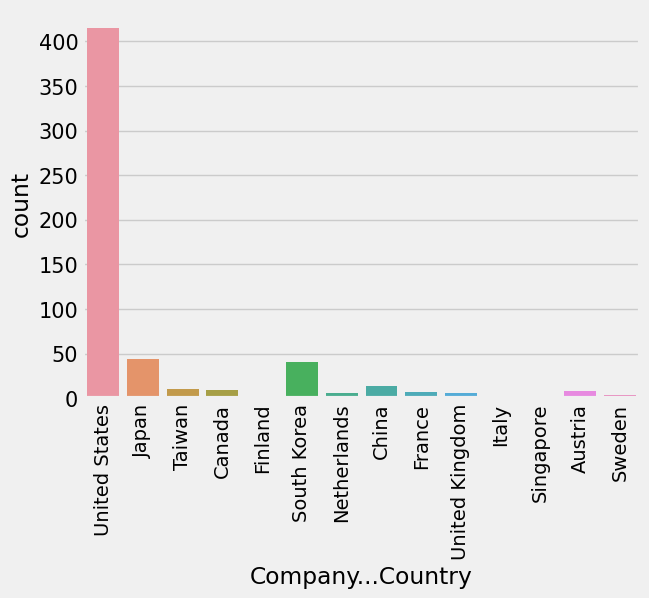

In [68]:
with plt.style.context("fivethirtyeight"):
    sns.countplot(x='Company...Country', data=df)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=15)
    ax.set_xlabel('Company...Country',fontsize=20,fontweight='bold')
    ax.set_ylabel('Count',fontsize=20,fontweight='bold')
    plt.show()

**Based on the country column of the wearable technology dataset, it appears that the majority of wearable technology products in the dataset are produced in the United States, with a total count of 415 products. The next highest producers are Japan and South Korea, with 44 and 41 products respectively. China, Taiwan, Canada, Austria, France, the Netherlands, and the United Kingdom are also represented in the dataset, although they produce significantly fewer wearable technology products than the top three countries.**